In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import csv
import calendar
import warnings
warnings.filterwarnings("ignore")

# File to Load (Remember to change these)
oct_2018_csv = "oct_2018.csv"
nov_2018_csv = "nov_2018.csv"
dec_2018_csv = "dec_2018.csv"
jan_2019_csv = "jan_2019.csv"
feb_2019_csv = "feb_2019.csv"
march_2019_csv = "march_2019.csv"
apr_2019_csv = "april_19.csv"

# Read the City and Ride Data
oct_18_df = pd.read_csv(oct_2018_csv)
nov_18_df = pd.read_csv(nov_2018_csv)
dec_18_df = pd.read_csv(dec_2018_csv)
jan_19_df = pd.read_csv(jan_2019_csv)
feb_19_df = pd.read_csv(feb_2019_csv)
mar_19_df = pd.read_csv(march_2019_csv)
apr_19_df = pd.read_csv(apr_2019_csv)

In [2]:
oct_18_df = oct_18_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
nov_18_df = nov_18_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
dec_18_df = dec_18_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
jan_19_df = jan_19_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
feb_19_df = feb_19_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
mar_19_df = mar_19_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})
apr_19_df = apr_19_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time Clear'})

In [3]:
oct_18_df.dropna(inplace=True)
oct_18_df = oct_18_df[oct_18_df["Time Clear"].str.contains(":")].reset_index(drop=True)
nov_18_df.dropna(inplace=True)
dec_18_df.dropna(inplace=True)
jan_19_df.dropna(inplace=True)
feb_19_df.dropna(inplace=True)
mar_19_df.dropna(inplace=True)
apr_19_df.dropna(inplace=True)

In [4]:
hospital_oct_count = oct_18_df.groupby('Hospital').count()
hospital_nov_count = nov_18_df.groupby('Hospital').count()
hospital_dec_count = dec_18_df.groupby('Hospital').count()
hospital_jan_count = jan_19_df.groupby('Hospital').count()
hospital_feb_count = feb_19_df.groupby('Hospital').count()
hospital_mar_count = mar_19_df.groupby('Hospital').count()
hospital_apr_count = apr_19_df.groupby('Hospital').count()

In [5]:
oct_18_df['Year'] = pd.DatetimeIndex(oct_18_df['Date Clear']).year
oct_18_df['Month'] = pd.DatetimeIndex(oct_18_df['Date Clear']).month
oct_18_df['Day'] = pd.DatetimeIndex(oct_18_df['Date Clear']).day
oct_18_df['Date Clear'] = pd.to_datetime(oct_18_df['Date Clear'], errors='coerce')
oct_18_df['day_of_week'] = oct_18_df['Date Clear'].dt.day_name()
oct_18_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,PAH,2018-10-01,0:30,2018,10,1,Monday
1,PAH,2018-09-30,23:15,2018,9,30,Sunday
2,PKR,2018-09-30,20:50,2018,9,30,Sunday
3,SAH,2018-09-30,16:30,2018,9,30,Sunday
4,LAH,2018-10-01,7:30,2018,10,1,Monday


In [6]:
converted_time_oct = oct_18_df['Time Clear']
converted_time_oct.head()

0     0:30
1    23:15
2    20:50
3    16:30
4     7:30
Name: Time Clear, dtype: object

In [7]:
def get_time_from_string_oct(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_oct = oct_18_df.copy()
clean_oct['converted_time'] = clean_oct['Time Clear'].map(get_time_from_string_oct)
clean_oct.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,PAH,2018-10-01,0:30,2018,10,1,Monday,0.500000
1,PAH,2018-09-30,23:15,2018,9,30,Sunday,23.250000
2,PKR,2018-09-30,20:50,2018,9,30,Sunday,20.833333
3,SAH,2018-09-30,16:30,2018,9,30,Sunday,16.500000
4,LAH,2018-10-01,7:30,2018,10,1,Monday,7.500000


In [8]:
def get_back_to_string_time_oct(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1
clean_oct = clean_oct.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_oct.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,14.855000,13.824242,17.416667,14.242424,11.727778,10.900000,12.702381
1,CRED,0.000000,0.000000,14.833333,0.000000,15.125000,0.000000,3.583333
2,CRK,13.719444,17.618333,10.370000,18.195238,16.563333,14.183333,15.573810
3,Golden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.333333
4,LAH,11.418750,9.500000,11.466667,14.585294,15.711905,14.629167,12.931579


In [9]:
def get_back_to_real_time_oct(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_oct[day] = clean_oct[day].apply(lambda x: get_back_to_real_time_oct(x))
clean_oct

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,2:51 PM,1:49 PM,5:25 PM,2:15 PM,11:44 AM,10:54 AM,12:42 PM
1,CRED,12:00 AM,12:00 AM,2:50 PM,12:00 AM,3:08 PM,12:00 AM,3:35 AM
2,CRK,1:43 PM,5:37 PM,10:22 AM,6:12 PM,4:34 PM,2:11 PM,3:34 PM
3,Golden,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,3:20 PM
4,LAH,11:25 AM,9:30 AM,11:28 AM,2:35 PM,3:43 PM,2:38 PM,12:56 PM
5,LAH WEST,8:50 PM,12:00 AM,12:00 AM,5:37 PM,3:00 PM,12:00 AM,12:00 AM
6,LAKEWOOD,12:00 AM,1:12 PM,12:00 AM,12:00 AM,9:37 AM,12:00 AM,12:00 AM
7,PAH,1:27 PM,1:34 PM,11:39 AM,12:35 PM,3:09 PM,3:37 PM,2:40 PM
8,PKR,2:55 PM,4:48 PM,2:49 PM,1:55 PM,3:42 PM,1:44 PM,1:54 PM
9,SAH,12:47 PM,2:07 PM,10:47 AM,1:37 PM,2:10 PM,4:42 PM,1:10 PM


In [10]:
#### November!!!!!

In [11]:
nov_18_df['Year'] = pd.DatetimeIndex(nov_18_df['Date Clear']).year
nov_18_df['Month'] = pd.DatetimeIndex(nov_18_df['Date Clear']).month
nov_18_df['Day'] = pd.DatetimeIndex(nov_18_df['Date Clear']).day
nov_18_df['Date Clear'] = pd.to_datetime(nov_18_df['Date Clear'], errors='coerce')
nov_18_df['day_of_week'] = nov_18_df['Date Clear'].dt.day_name()
nov_18_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,PAH,2018-10-31,23:50,2018,10,31,Wednesday
1,PKR,2018-11-01,1:37,2018,11,1,Thursday
2,144TH,2018-11-01,9:35,2018,11,1,Thursday
3,PAH,2018-10-31,17:50,2018,10,31,Wednesday
4,PKR,2018-11-01,1:42,2018,11,1,Thursday


In [12]:
converted_time_nov = nov_18_df['Time Clear']
converted_time_nov.head()

0    23:50
1     1:37
2     9:35
3    17:50
4     1:42
Name: Time Clear, dtype: object

In [13]:
def get_time_from_string_nov(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_nov = nov_18_df.copy()
clean_nov['converted_time'] = clean_nov['Time Clear'].map(get_time_from_string_nov)
clean_nov.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,PAH,2018-10-31,23:50,2018,10,31,Wednesday,23.833333
1,PKR,2018-11-01,1:37,2018,11,1,Thursday,1.616667
2,144TH,2018-11-01,9:35,2018,11,1,Thursday,9.583333
3,PAH,2018-10-31,17:50,2018,10,31,Wednesday,17.833333
4,PKR,2018-11-01,1:42,2018,11,1,Thursday,1.700000


In [14]:
def get_back_to_string_time_nov(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_nov = clean_nov.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_nov

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,15.702778,16.616667,13.563889,13.668519,13.706667,12.338462,11.292857
1,CRED,0.000000,0.000000,11.083333,0.000000,0.000000,0.000000,0.000000
2,CRK,17.208333,15.161111,19.925000,18.125000,15.875000,8.883333,11.643333
3,HIGHLANDS,0.000000,0.000000,0.000000,0.000000,0.000000,6.750000,0.000000
4,INDIAN PEAKS,0.000000,0.000000,0.000000,0.000000,11.500000,0.000000,0.000000
5,LAH,13.966667,13.230208,12.962963,12.000000,13.635185,11.390278,12.763333
6,LAKEWOOD,0.000000,0.000000,18.916667,0.000000,0.000000,0.000000,0.000000
7,PAH,12.768667,13.496212,13.252083,13.245370,14.090741,12.900000,13.174691
8,PKR,11.570588,17.052381,13.293750,12.813333,13.536842,13.141667,14.970513
9,SAH,12.232292,14.644872,11.716667,14.476190,14.190833,14.944048,12.588542


In [15]:
def get_back_to_real_time_nov(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_nov[day] = clean_nov[day].apply(lambda x: get_back_to_real_time_nov(x))
clean_nov

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,3:42 PM,4:37 PM,1:34 PM,1:40 PM,1:42 PM,12:20 PM,11:18 AM
1,CRED,12:00 AM,12:00 AM,11:05 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
2,CRK,5:13 PM,3:10 PM,7:56 PM,6:08 PM,3:52 PM,8:53 AM,11:39 AM
3,HIGHLANDS,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,6:45 AM,12:00 AM
4,INDIAN PEAKS,12:00 AM,12:00 AM,12:00 AM,12:00 AM,11:30 AM,12:00 AM,12:00 AM
5,LAH,1:58 PM,1:14 PM,12:58 PM,11:60 AM,1:38 PM,11:23 AM,12:46 PM
6,LAKEWOOD,12:00 AM,12:00 AM,6:55 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
7,PAH,12:46 PM,1:30 PM,1:15 PM,1:15 PM,2:05 PM,12:54 PM,1:10 PM
8,PKR,11:34 AM,5:03 PM,1:18 PM,12:49 PM,1:32 PM,1:08 PM,2:58 PM
9,SAH,12:14 PM,2:39 PM,11:43 AM,2:29 PM,2:11 PM,2:57 PM,12:35 PM


In [16]:
#### December!!!!!

In [17]:
dec_18_df['Year'] = pd.DatetimeIndex(dec_18_df['Date Clear']).year
dec_18_df['Month'] = pd.DatetimeIndex(dec_18_df['Date Clear']).month
dec_18_df['Day'] = pd.DatetimeIndex(dec_18_df['Date Clear']).day
dec_18_df['Date Clear'] = pd.to_datetime(dec_18_df['Date Clear'], errors='coerce')
dec_18_df['day_of_week'] = dec_18_df['Date Clear'].dt.day_name()
dec_18_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,CRK,2018-11-30,18:10,2018,11,30,Friday
1,PAH,2018-11-30,14:10,2018,11,30,Friday
2,SAH,2018-11-30,20:30,2018,11,30,Friday
3,CRK,2018-11-30,19:00,2018,11,30,Friday
4,SAH,2018-11-30,23:50,2018,11,30,Friday


In [18]:
converted_time_dec = dec_18_df['Time Clear']
converted_time_dec.head()

0    18:10
1    14:10
2    20:30
3    19:00
4    23:50
Name: Time Clear, dtype: object

In [19]:
def get_time_from_string_dec(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_dec = dec_18_df.copy()
clean_dec['converted_time'] = clean_dec['Time Clear'].map(get_time_from_string_dec)
clean_dec.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,CRK,2018-11-30,18:10,2018,11,30,Friday,18.166667
1,PAH,2018-11-30,14:10,2018,11,30,Friday,14.166667
2,SAH,2018-11-30,20:30,2018,11,30,Friday,20.500000
3,CRK,2018-11-30,19:00,2018,11,30,Friday,19.000000
4,SAH,2018-11-30,23:50,2018,11,30,Friday,23.833333


In [20]:
def get_back_to_string_time_dec(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_dec = clean_dec.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_dec.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,14.093056,13.841667,11.087500,11.512821,14.391667,12.625641,10.930000
1,CRED,0.000000,18.616667,0.000000,0.000000,0.000000,0.000000,0.000000
2,CRK,16.281667,12.366667,16.263889,11.766667,13.027778,18.527778,13.342857
3,LAH,12.691026,13.500000,11.777451,13.109167,15.158889,12.807143,12.563636
4,LAH WEST,18.875000,0.000000,6.916667,15.500000,0.000000,0.000000,0.000000


In [21]:
def get_back_to_real_time_dec(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_dec[day] = clean_dec[day].apply(lambda x: get_back_to_real_time_dec(x))
clean_dec

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,2:06 PM,1:51 PM,11:05 AM,11:31 AM,2:23 PM,12:38 PM,10:56 AM
1,CRED,12:00 AM,6:37 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
2,CRK,4:17 PM,12:22 PM,4:16 PM,11:46 AM,1:02 PM,6:32 PM,1:21 PM
3,LAH,12:41 PM,1:30 PM,11:47 AM,1:07 PM,3:10 PM,12:48 PM,12:34 PM
4,LAH WEST,6:52 PM,12:00 AM,6:55 AM,3:30 PM,12:00 AM,12:00 AM,12:00 AM
5,LAKEWOOD,9:00 PM,12:00 AM,7:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
6,PAH,3:35 PM,1:11 PM,2:24 PM,12:13 PM,2:38 PM,1:49 PM,1:52 PM
7,PKR,12:52 PM,12:01 PM,12:08 PM,9:13 AM,1:36 PM,11:54 AM,1:14 PM
8,SAH,3:09 PM,12:45 PM,12:48 PM,12:43 PM,2:10 PM,2:58 PM,2:58 PM
9,SLED,12:00 AM,12:00 AM,12:00 AM,12:00 AM,8:40 AM,12:00 AM,5:59 PM


In [22]:
#### January!!!!!

In [23]:
jan_19_df['Year'] = pd.DatetimeIndex(jan_19_df['Date Clear']).year
jan_19_df['Month'] = pd.DatetimeIndex(jan_19_df['Date Clear']).month
jan_19_df['Day'] = pd.DatetimeIndex(jan_19_df['Date Clear']).day
jan_19_df['Date Clear'] = pd.to_datetime(jan_19_df['Date Clear'], errors='coerce')
jan_19_df['day_of_week'] = jan_19_df['Date Clear'].dt.day_name()
jan_19_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,144TH,2019-01-31,11:30,2019,1,31,Thursday
1,144TH,2019-01-13,22:00,2019,1,13,Sunday
2,144TH,2019-01-29,19:30,2019,1,29,Tuesday
3,144TH,2019-01-21,10:55,2019,1,21,Monday
4,144TH,2019-01-13,16:39,2019,1,13,Sunday


In [24]:
converted_time_jan = jan_19_df['Time Clear']
converted_time_jan.head()

0    11:30
1    22:00
2    19:30
3    10:55
4    16:39
Name: Time Clear, dtype: object

In [25]:
def get_time_from_string_jan(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_jan = jan_19_df.copy()
clean_jan['converted_time'] = clean_jan['Time Clear'].map(get_time_from_string_jan)
clean_jan.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,144TH,2019-01-31,11:30,2019,1,31,Thursday,11.500000
1,144TH,2019-01-13,22:00,2019,1,13,Sunday,22.000000
2,144TH,2019-01-29,19:30,2019,1,29,Tuesday,19.500000
3,144TH,2019-01-21,10:55,2019,1,21,Monday,10.916667
4,144TH,2019-01-13,16:39,2019,1,13,Sunday,16.650000


In [26]:
def get_back_to_string_time_jan(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_jan = clean_jan.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_jan.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,17.847222,13.294444,13.266667,14.366667,11.921667,13.791667,14.019048
1,CRED,0.000000,0.000000,0.000000,12.875000,15.166667,0.000000,0.000000
2,CRK,14.012500,11.413889,11.183333,11.052381,11.789394,13.200000,11.678333
3,INDIAN PEAKS,0.000000,0.000000,19.000000,19.483333,0.000000,0.000000,18.816667
4,LAH,12.503333,17.191176,13.223333,9.519048,13.590625,14.251389,11.763725


In [27]:
def get_back_to_real_time_jan(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_jan[day] = clean_jan[day].apply(lambda x: get_back_to_real_time_jan(x))
clean_jan

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,5:51 PM,1:18 PM,1:16 PM,2:22 PM,11:55 AM,1:48 PM,2:01 PM
1,CRED,12:00 AM,12:00 AM,12:00 AM,12:52 PM,3:10 PM,12:00 AM,12:00 AM
2,CRK,2:01 PM,11:25 AM,11:11 AM,11:03 AM,11:47 AM,1:12 PM,11:41 AM
3,INDIAN PEAKS,12:00 AM,12:00 AM,7:00 PM,7:29 PM,12:00 AM,12:00 AM,6:49 PM
4,LAH,12:30 PM,5:11 PM,1:13 PM,9:31 AM,1:35 PM,2:15 PM,11:46 AM
5,LAH WEST,12:00 AM,12:00 AM,12:00 AM,10:22 PM,10:15 AM,12:00 AM,12:00 AM
6,LAKEWOOD,10:50 PM,12:00 AM,11:00 PM,12:00 AM,4:00 PM,12:00 AM,12:00 AM
7,MERIDIAN,12:00 AM,11:48 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
8,PAH,3:19 PM,1:17 PM,1:23 PM,1:28 PM,2:23 PM,1:05 PM,3:48 PM
9,PKR,1:07 PM,1:22 PM,12:35 PM,3:60 PM,3:16 PM,1:02 PM,11:18 AM


In [28]:
#### February!!!!!

In [29]:
feb_19_df['Year'] = pd.DatetimeIndex(feb_19_df['Date Clear']).year
feb_19_df['Month'] = pd.DatetimeIndex(feb_19_df['Date Clear']).month
feb_19_df['Day'] = pd.DatetimeIndex(feb_19_df['Date Clear']).day
feb_19_df['Date Clear'] = pd.to_datetime(feb_19_df['Date Clear'], errors='coerce')
feb_19_df['day_of_week'] = feb_19_df['Date Clear'].dt.day_name()
feb_19_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,SAH,2019-02-22,12:36,2019,2,22,Friday
1,CRK,2019-02-03,22:45,2019,2,3,Sunday
2,PKR,2019-02-06,5:30,2019,2,6,Wednesday
3,CRK,2019-02-13,15:23,2019,2,13,Wednesday
4,CRK,2019-02-17,16:30,2019,2,17,Sunday


In [30]:
converted_time_feb = feb_19_df['Time Clear']
converted_time_feb.head()

0    12:36
1    22:45
2     5:30
3    15:23
4    16:30
Name: Time Clear, dtype: object

In [31]:
def get_time_from_string_feb(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_feb = feb_19_df.copy()
clean_feb['converted_time'] = clean_feb['Time Clear'].map(get_time_from_string_feb)
clean_feb.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,SAH,2019-02-22,12:36,2019,2,22,Friday,12.600000
1,CRK,2019-02-03,22:45,2019,2,3,Sunday,22.750000
2,PKR,2019-02-06,5:30,2019,2,6,Wednesday,5.500000
3,CRK,2019-02-13,15:23,2019,2,13,Wednesday,15.383333
4,CRK,2019-02-17,16:30,2019,2,17,Sunday,16.500000


In [32]:
def get_back_to_string_time_feb(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_feb = clean_feb.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_feb.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,10.403704,12.880952,12.186111,12.470000,11.181818,11.866667,11.383333
1,84TH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.250000
2,CRED,11.666667,0.000000,0.000000,17.000000,0.000000,10.750000,15.083333
3,CRK,9.972917,13.738889,15.453704,14.671667,15.430556,15.461111,15.461111
4,GOLDEN,0.000000,23.916667,0.000000,0.000000,0.000000,18.916667,0.000000


In [33]:
def get_back_to_real_time_feb(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_feb[day] = clean_feb[day].apply(lambda x: get_back_to_real_time_feb(x))
clean_feb

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,10:24 AM,12:53 PM,12:11 PM,12:28 PM,11:11 AM,11:52 AM,11:23 AM
1,84TH,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,8:15 PM
2,CRED,11:40 AM,12:00 AM,12:00 AM,5:00 PM,12:00 AM,10:45 AM,3:05 PM
3,CRK,9:58 AM,1:44 PM,3:27 PM,2:40 PM,3:26 PM,3:28 PM,3:28 PM
4,GOLDEN,12:00 AM,11:55 PM,12:00 AM,12:00 AM,12:00 AM,6:55 PM,12:00 AM
5,LAH,1:16 PM,11:20 AM,2:29 PM,12:03 PM,1:35 PM,11:52 AM,10:53 AM
6,LAH WEST,12:00 AM,12:15 PM,11:30 AM,12:39 PM,12:00 AM,5:31 AM,7:37 PM
7,LAKEWOOD,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,4:10 PM
8,MERIDIAN,9:30 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
9,PAH,1:46 PM,2:30 PM,12:21 PM,1:09 PM,2:19 PM,3:13 PM,1:55 PM


In [34]:
#### March!!!!!!!

In [35]:
mar_19_df['Year'] = pd.DatetimeIndex(mar_19_df['Date Clear']).year
mar_19_df['Month'] = pd.DatetimeIndex(mar_19_df['Date Clear']).month
mar_19_df['Day'] = pd.DatetimeIndex(mar_19_df['Date Clear']).day
mar_19_df['Date Clear'] = pd.to_datetime(mar_19_df['Date Clear'], errors='coerce')
mar_19_df['day_of_week'] = mar_19_df['Date Clear'].dt.day_name()
mar_19_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,144TH,2019-03-31,19:00,2019,3,31,Sunday
1,144TH,2019-03-30,20:15,2019,3,30,Saturday
2,144TH,2019-03-04,20:30,2019,3,4,Monday
3,144TH,2019-03-22,21:40,2019,3,22,Friday
4,144TH,2019-03-28,20:10,2019,3,28,Thursday


In [36]:
converted_time_mar = mar_19_df['Time Clear']
converted_time_mar.head()

0    19:00
1    20:15
2    20:30
3    21:40
4    20:10
Name: Time Clear, dtype: object

In [37]:
def get_time_from_string_mar(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_mar = mar_19_df.copy()
clean_mar['converted_time'] = clean_mar['Time Clear'].map(get_time_from_string_mar)
clean_mar.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,144TH,2019-03-31,19:00,2019,3,31,Sunday,19.000000
1,144TH,2019-03-30,20:15,2019,3,30,Saturday,20.250000
2,144TH,2019-03-04,20:30,2019,3,4,Monday,20.500000
3,144TH,2019-03-22,21:40,2019,3,22,Friday,21.666667
4,144TH,2019-03-28,20:10,2019,3,28,Thursday,20.166667


In [38]:
def get_back_to_string_time_mar(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_mar = clean_mar.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_mar.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,12.600000,13.450000,14.766667,12.593750,11.742424,16.672222,9.395833
1,CRK,12.335000,17.866667,13.643333,14.808333,14.633333,17.583333,12.900000
2,LAH,12.665741,14.196032,13.479167,12.218421,13.007778,11.443137,10.973958
3,LAH WEST,8.416667,21.500000,0.000000,0.000000,7.916667,0.000000,7.000000
4,PAH,13.874762,15.452381,14.504630,13.950000,11.974359,14.745652,15.200758


In [39]:
def get_back_to_real_time_mar(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_mar[day] = clean_mar[day].apply(lambda x: get_back_to_real_time_mar(x))
clean_mar

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,12:36 PM,1:27 PM,2:46 PM,12:36 PM,11:45 AM,4:40 PM,9:24 AM
1,CRK,12:20 PM,5:52 PM,1:39 PM,2:49 PM,2:38 PM,5:35 PM,12:54 PM
2,LAH,12:40 PM,2:12 PM,1:29 PM,12:13 PM,1:00 PM,11:27 AM,10:58 AM
3,LAH WEST,8:25 AM,9:30 PM,12:00 AM,12:00 AM,7:55 AM,12:00 AM,7:00 AM
4,PAH,1:52 PM,3:27 PM,2:30 PM,1:57 PM,11:58 AM,2:45 PM,3:12 PM
5,PKR,11:48 AM,3:15 PM,1:19 PM,9:57 AM,12:40 PM,1:58 PM,12:01 PM
6,SAH,11:26 AM,3:43 PM,12:18 PM,11:56 AM,12:43 PM,12:54 PM,1:31 PM
7,SLED,12:00 AM,12:10 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
8,STM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,9:38 AM,7:30 PM,12:25 PM


In [40]:
#### April!!!!!

In [41]:
apr_19_df['Year'] = pd.DatetimeIndex(apr_19_df['Date Clear']).year
apr_19_df['Month'] = pd.DatetimeIndex(apr_19_df['Date Clear']).month
apr_19_df['Day'] = pd.DatetimeIndex(apr_19_df['Date Clear']).day
apr_19_df['Date Clear'] = pd.to_datetime(apr_19_df['Date Clear'], errors='coerce')
apr_19_df['day_of_week'] = apr_19_df['Date Clear'].dt.day_name()
apr_19_df.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week
0,SAH,2019-04-26,15:15,2019,4,26,Friday
1,144TH,2019-04-27,18:32,2019,4,27,Saturday
2,CRK,2019-04-25,0:45,2019,4,25,Thursday
3,144TH,2019-04-27,9:10,2019,4,27,Saturday
4,144TH,2019-03-31,22:00,2019,3,31,Sunday


In [42]:
converted_time_apr = apr_19_df['Time Clear']
converted_time_apr.head()

0    15:15
1    18:32
2     0:45
3     9:10
4    22:00
Name: Time Clear, dtype: object

In [43]:
def get_time_from_string_apr(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_apr = apr_19_df.copy()
clean_apr['converted_time'] = clean_apr['Time Clear'].map(get_time_from_string_apr)
clean_apr.head()

,Hospital,Date Clear,Time Clear,Year,Month,Day,day_of_week,converted_time
0,SAH,2019-04-26,15:15,2019,4,26,Friday,15.250000
1,144TH,2019-04-27,18:32,2019,4,27,Saturday,18.533333
2,CRK,2019-04-25,0:45,2019,4,25,Thursday,0.750000
3,144TH,2019-04-27,9:10,2019,4,27,Saturday,9.166667
4,144TH,2019-03-31,22:00,2019,3,31,Sunday,22.000000


In [44]:
def get_back_to_string_time_apr(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_apr = clean_apr.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_apr.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,14.108333,10.018333,14.970513,15.506250,12.677083,11.948889,13.636364
1,84TH,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CRK,19.083333,11.986905,21.444444,12.250000,10.746667,5.350000,10.464286
3,GOLDEN,0.000000,0.000000,23.750000,0.000000,0.000000,0.000000,18.166667
4,LAH,15.458974,13.437255,16.365385,13.429167,14.859375,11.691667,13.909259


In [45]:
def get_back_to_real_time_apr(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_apr[day] = clean_apr[day].apply(lambda x: get_back_to_real_time_apr(x))
clean_apr

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,2:07 PM,10:01 AM,2:58 PM,3:30 PM,12:41 PM,11:57 AM,1:38 PM
1,84TH,12:00 AM,1:00 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM
2,CRK,7:05 PM,11:59 AM,9:27 PM,12:15 PM,10:45 AM,5:21 AM,10:28 AM
3,GOLDEN,12:00 AM,12:00 AM,11:45 PM,12:00 AM,12:00 AM,12:00 AM,6:10 PM
4,LAH,3:28 PM,1:26 PM,4:22 PM,1:26 PM,2:52 PM,11:42 AM,1:55 PM
5,LAH WEST,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,7:43 PM,12:00 AM
6,LAKEWOOD,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,11:00 AM,12:00 AM
7,PAH,2:00 PM,1:39 PM,11:34 AM,1:15 PM,3:04 PM,2:32 PM,1:10 PM
8,PKR,10:58 AM,10:37 AM,1:08 PM,12:22 PM,1:06 PM,2:35 PM,12:07 PM
9,SAH,1:07 PM,3:09 PM,1:03 PM,10:57 AM,11:58 AM,10:59 AM,11:35 AM


In [46]:
import glob

path = r'\Users\damia\Desktop\Final-Project' # use your path
# path = 'Users/lauratalkington/Users/Desktop/Final-Project'
all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_df = pd.concat(li, axis=0, ignore_index=True)
all_df

,HOSPITAL,DATE MED CLEAR AND PEPCS NOTIFIED,TIME MED CLEAR AND PEPCS NOTIFIED
0,SAH,4/26/19,15:15
1,144TH,4/27/19,18:32
2,CRK,4/25/19,0:45
3,144TH,4/27/19,9:10
4,144TH,3/31/19,22:00
5,CRK,4/1/19,7:15
6,LAH,4/1/19,7:15
7,CRK,4/1/19,17:25
8,CRK,4/1/19,11:00
9,CRK,4/2/19,5:50


In [47]:
all_df = all_df.rename(columns={'HOSPITAL': 'Hospital', 'DATE MED CLEAR AND PEPCS NOTIFIED': 'Date_Clear', 'TIME MED CLEAR AND PEPCS NOTIFIED': 'Time_Clear'})
all_df.dropna(inplace=True)
all_df

,Hospital,Date_Clear,Time_Clear
0,SAH,4/26/19,15:15
1,144TH,4/27/19,18:32
2,CRK,4/25/19,0:45
3,144TH,4/27/19,9:10
4,144TH,3/31/19,22:00
5,CRK,4/1/19,7:15
6,LAH,4/1/19,7:15
7,CRK,4/1/19,17:25
8,CRK,4/1/19,11:00
9,CRK,4/2/19,5:50


In [48]:
hospital_all_count = all_df.groupby('Hospital').count()

In [49]:
all_df['Year'] = pd.DatetimeIndex(all_df['Date_Clear']).year
all_df['Month'] = pd.DatetimeIndex(all_df['Date_Clear']).month
all_df['Day'] = pd.DatetimeIndex(all_df['Date_Clear']).day
all_df['Date_Clear'] = pd.to_datetime(all_df['Date_Clear'], errors='coerce')
all_df['day_of_week'] = all_df['Date_Clear'].dt.day_name()
all_df.head()

,Hospital,Date_Clear,Time_Clear,Year,Month,Day,day_of_week
0,SAH,2019-04-26,15:15,2019,4,26,Friday
1,144TH,2019-04-27,18:32,2019,4,27,Saturday
2,CRK,2019-04-25,0:45,2019,4,25,Thursday
3,144TH,2019-04-27,9:10,2019,4,27,Saturday
4,144TH,2019-03-31,22:00,2019,3,31,Sunday


In [50]:
converted_time_all = all_df['Time_Clear']
converted_time_all.head()

0    15:15
1    18:32
2     0:45
3     9:10
4    22:00
Name: Time_Clear, dtype: object

In [51]:
import datetime as dt
def get_time_from_string_all(row):
    try:
        hour, minute = row.split(":")
        return int(hour) + int(minute) / 60
    except AttributeError:
        return "checklater"
    
clean_all = all_df.copy()
clean_all['converted_time'] = clean_all['Time_Clear'].map(get_time_from_string_all)
clean_all_regr = clean_all
clean_all.head()

# clean_all_regr["Date_Clear"].apply(lambda x: x.day)
clean_all_regr['day_of_week_in_number'] = clean_all_regr['Date_Clear'].dt.dayofweek
clean_all_regr.head()
# clean_all_regr['day_number'] = clean_all_regr['day_of_week'].date_range('2016-12-31', '2019-05-08', freq='D').to_series()

,Hospital,Date_Clear,Time_Clear,Year,Month,Day,day_of_week,converted_time,day_of_week_in_number
0,SAH,2019-04-26,15:15,2019,4,26,Friday,15.250000,4
1,144TH,2019-04-27,18:32,2019,4,27,Saturday,18.533333,5
2,CRK,2019-04-25,0:45,2019,4,25,Thursday,0.750000,3
3,144TH,2019-04-27,9:10,2019,4,27,Saturday,9.166667,5
4,144TH,2019-03-31,22:00,2019,3,31,Sunday,22.000000,6


In [52]:
# clean_all.conv

In [53]:
def get_back_to_string_time_all(number):
    if number < 13:
        part1 = number
    else:
        part1 = number - 12
    return part1

clean_all = clean_all.groupby(['Hospital', 'day_of_week']).mean().converted_time.unstack('day_of_week', fill_value=0).reset_index()
clean_all.head()

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,14.078704,13.189583,13.971515,13.324495,12.477027,12.534388,12.028611
1,84TH,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,20.250000
2,CRED,11.666667,18.616667,12.958333,14.250000,15.138889,10.750000,9.333333
3,CRK,14.250629,13.987069,14.847436,14.125725,14.068301,13.078395,12.934752
4,GOLDEN,0.000000,23.916667,23.750000,0.000000,0.000000,18.916667,18.166667


In [54]:
def get_back_to_real_time_all(number):
    if number >= 12:
        ap = "PM"
    else:
        ap = "AM"
    hour = (int(number)-1) % 12 + 1
    minute = str(round((number - int(number)) * 60))
    if len(minute) == 1:
        minute = "0" + str(minute)
    return f"{hour}:{minute} {ap}"

for day in ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday']:
    clean_all[day] = clean_all[day].apply(lambda x: get_back_to_real_time_all(x))
clean_all

day_of_week,Hospital,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,144TH,2:05 PM,1:11 PM,1:58 PM,1:19 PM,12:29 PM,12:32 PM,12:02 PM
1,84TH,12:00 AM,1:00 PM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,8:15 PM
2,CRED,11:40 AM,6:37 PM,12:58 PM,2:15 PM,3:08 PM,10:45 AM,9:20 AM
3,CRK,2:15 PM,1:59 PM,2:51 PM,2:08 PM,2:04 PM,1:05 PM,12:56 PM
4,GOLDEN,12:00 AM,11:55 PM,11:45 PM,12:00 AM,12:00 AM,6:55 PM,6:10 PM
5,Golden,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,3:20 PM
6,HIGHLANDS,12:00 AM,12:00 AM,12:00 AM,12:00 AM,12:00 AM,6:45 AM,12:00 AM
7,INDIAN PEAKS,12:00 AM,12:00 AM,7:00 PM,7:29 PM,11:30 AM,12:00 AM,6:49 PM
8,LAH,1:12 PM,1:06 PM,1:16 PM,12:32 PM,2:07 PM,12:50 PM,12:06 PM
9,LAH WEST,4:45 PM,3:20 PM,9:13 AM,4:44 PM,10:16 AM,12:37 PM,1:19 PM


In [55]:
# all_df.to_csv('all_hospitals.csv', index=True)

In [56]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
clean_all_regr2 = clean_all_regr
clean_all_regr2.head()

,Hospital,Date_Clear,Time_Clear,Year,Month,Day,day_of_week,converted_time,day_of_week_in_number
0,SAH,2019-04-26,15:15,2019,4,26,Friday,15.250000,4
1,144TH,2019-04-27,18:32,2019,4,27,Saturday,18.533333,5
2,CRK,2019-04-25,0:45,2019,4,25,Thursday,0.750000,3
3,144TH,2019-04-27,9:10,2019,4,27,Saturday,9.166667,5
4,144TH,2019-03-31,22:00,2019,3,31,Sunday,22.000000,6


In [58]:
y = clean_all_regr.converted_time.values.reshape(-1, 1)
X = clean_all_regr.day_of_week_in_number.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (4108, 1) (4108, 1)


array([[4],
       [5],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

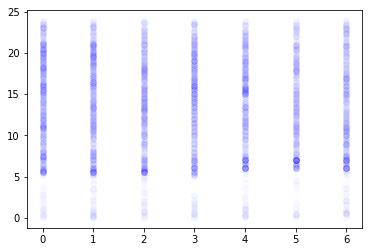

In [59]:
plt.scatter(X, y, c='blue',alpha=.01)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [61]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
print('Time Cleared: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Time Cleared:  [[-0.11008214]]
y-axis intercept:  [13.7824118]


In [63]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[6]]


In [64]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

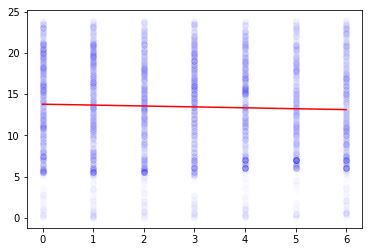

In [65]:
plt.scatter(X, y, c='blue',alpha=.01)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

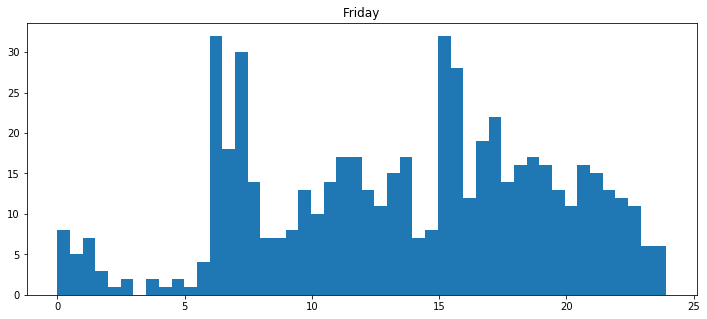

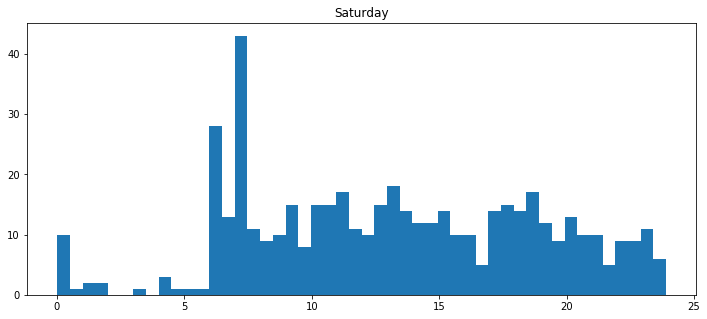

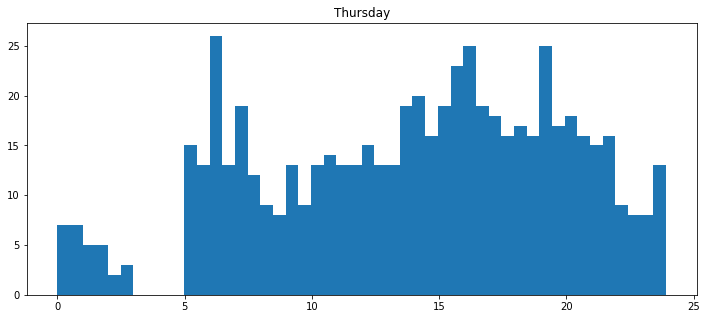

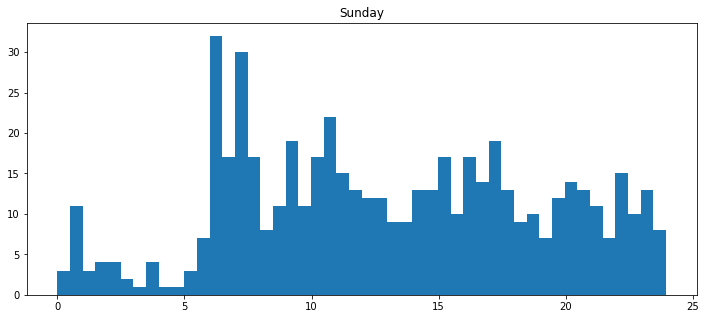

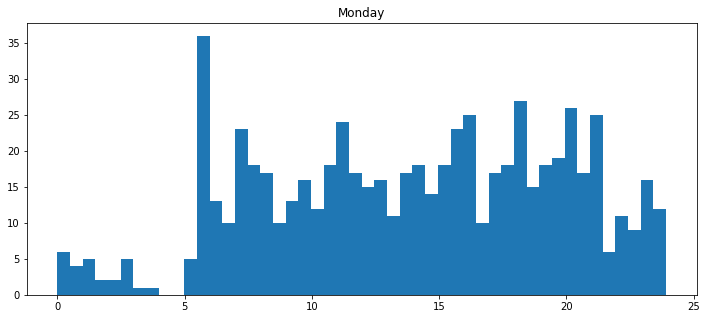

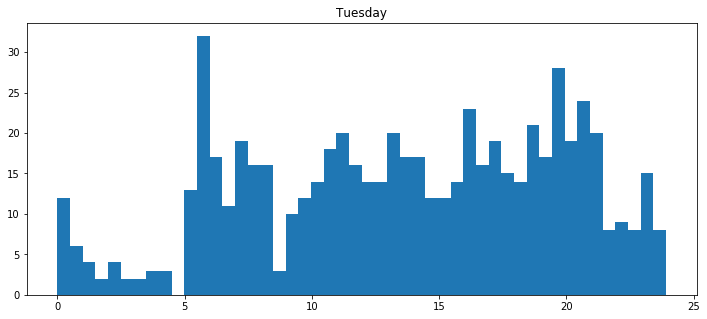

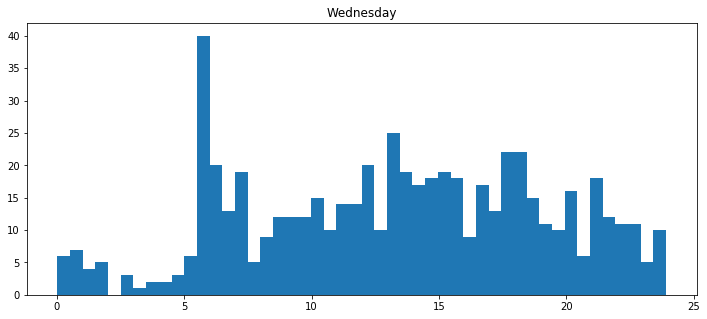

In [66]:
def hist(day):
    plt.figure(figsize=(12,5))
    temp = clean_all_regr2[clean_all_regr2["day_of_week"]==day]
    x = list(temp["converted_time"])
    plt.hist(x,bins=48)
    plt.title(day)
    plt.show()
for d in clean_all_regr2["day_of_week"].unique():
    hist(d)

In [67]:
clean_all_regr2.head()

,Hospital,Date_Clear,Time_Clear,Year,Month,Day,day_of_week,converted_time,day_of_week_in_number
0,SAH,2019-04-26,15:15,2019,4,26,Friday,15.250000,4
1,144TH,2019-04-27,18:32,2019,4,27,Saturday,18.533333,5
2,CRK,2019-04-25,0:45,2019,4,25,Thursday,0.750000,3
3,144TH,2019-04-27,9:10,2019,4,27,Saturday,9.166667,5
4,144TH,2019-03-31,22:00,2019,3,31,Sunday,22.000000,6


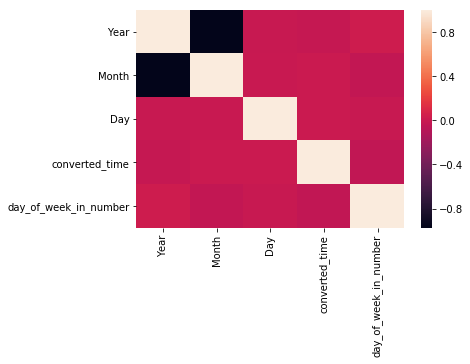

In [68]:
import seaborn as sns

corr = clean_all_regr2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [69]:
corr = clean_all_regr2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Day,converted_time,day_of_week_in_number
Year,1,-0.971819,-0.00882071,-0.0151871,0.02518
Month,-0.971819,1,0.00118082,0.00673308,-0.0245926
Day,-0.00882071,0.00118082,1,0.014013,-0.00669032
converted_time,-0.0151871,0.00673308,0.014013,1,-0.037485
day_of_week_in_number,0.02518,-0.0245926,-0.00669032,-0.037485,1


In [70]:
y = clean_all_regr2['converted_time']
X = clean_all_regr2[['Year','Month','Day','day_of_week_in_number']]

In [71]:
regr = LinearRegression().fit(X, y)

In [72]:
predicted = regr.predict(X)

In [73]:
regr.score(X,y)

0.002926899093836255

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, predicted)

34.348341687356374

In [75]:
from sklearn.ensemble import RandomForestRegressor
raf_regr = RandomForestRegressor(max_depth=None, random_state=0,
                             n_estimators=20)
raf_regr.fit(X,y)
rf_pred = raf_regr.predict(X)
mean_squared_error(y, rf_pred) 

C:\Users\damia\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


32.89797435861442

In [76]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=10.0)
clf.fit(X, y) 
clf_pred = clf.predict(X)

mean_squared_error(y, clf_pred)

34.349375921225715

In [77]:
clean_all_regr2[(clean_all_regr2["day_of_week"]=="Friday") & (clean_all_regr2["Day"]==5) & (clean_all_regr2["Hospital"])]

,Hospital,Date_Clear,Time_Clear,Year,Month,Day,day_of_week,converted_time,day_of_week_in_number
42,PAH,2019-04-05,6:35,2019,4,5,Friday,6.583333,4
43,PKR,2019-04-05,6:30,2019,4,5,Friday,6.500000,4
44,SAH,2019-04-05,6:00,2019,4,5,Friday,6.000000,4
46,PAH,2019-04-05,22:25,2019,4,5,Friday,22.416667,4
47,PAH,2019-04-05,18:35,2019,4,5,Friday,18.583333,4
48,PAH,2019-04-05,15:20,2019,4,5,Friday,15.333333,4
50,SAH,2019-04-05,15:25,2019,4,5,Friday,15.416667,4
51,SAH,2019-04-05,14:35,2019,4,5,Friday,14.583333,4
52,SAH,2019-04-05,11:40,2019,4,5,Friday,11.666667,4
297,144TH,2019-04-05,12:00,2019,4,5,Friday,12.000000,4
